In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder


### XOR calssification data

In [8]:
X_base = [[0,0],[0,1],[1,0],[1,1]]
y_base = [0,1,1,0]
X_list = []
y_list = []
for _ in range(100000):
    i = np.random.randint(0, 4)
    x = np.array(X_base[i]) + np.random.normal(0, 0.1, 2)
    X_list.append(x)
    y_list.append(y_base[i])

df = pd.DataFrame(X_list, columns=['x1','x2'])
df['y'] = y_list

df.to_csv("../data/xor_data.csv", index=False)

### Blob classification data

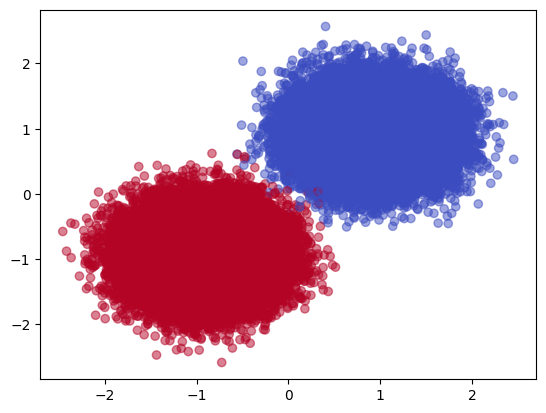

In [3]:
X, y = datasets.make_blobs(n_samples=100000, centers=[[1, 1], [-1, -1]], n_features=2, cluster_std=[0.4, 0.4])
s = StandardScaler()
X_s = s.fit_transform(X)

plt.scatter(X_s[:,0], X_s[:,1], c=y, cmap='coolwarm', alpha=0.5)
plt.show()

blob_data = pd.DataFrame({'x1': X_s[:,0], 'x2': X_s[:,1], 'y': y})
blob_data.to_csv("../data/blob_data.csv", index=False)

### Moons classification data

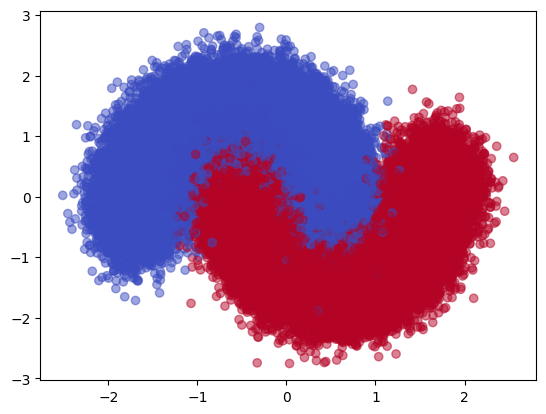

In [7]:
X, y = datasets.make_moons(n_samples=100000, shuffle=True, noise=0.2)
s = StandardScaler()
X_s = s.fit_transform(X)

plt.scatter(X_s[:,0], X_s[:,1], c=y, cmap='coolwarm', alpha=0.5)
plt.show()

moon_data = pd.DataFrame({'x1': X_s[:,0], 'x2': X_s[:,1], 'y': y})
moon_data.to_csv("../data/moon_data.csv", index=False)

### Letter classificiation dataset

In [5]:
def calculate_outlier_bounds(df, a=1.5):
    bounds = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - a * IQR
            upper_bound = Q3 + a * IQR
            bounds[column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    return pd.DataFrame(bounds).T

def print_outlier_counts(df, bounds_df):
    for column in bounds_df.index:
        lower = bounds_df.loc[column, 'lower_bound']
        upper = bounds_df.loc[column, 'upper_bound']
        outliers = df[(df[column] < lower) | (df[column] > upper)]
        nr_outliers = len(outliers)
        print(f"Column '{column}': {nr_outliers} outliers")

def remove_outliers_iqr(df, a=1.5):
    numeric_df = df.select_dtypes(include='number')
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - a * IQR
    upper_bound = Q3 + a * IQR
    mask = ((numeric_df >= lower_bound) & (numeric_df <= upper_bound)).all(axis=1)
    return df[mask].reset_index(drop=True)

In [6]:
letter_recognition = fetch_ucirepo(id=59) 
  
X = letter_recognition.data.features 
y = letter_recognition.data.targets 

s = StandardScaler()
X_s = s.fit_transform(X)
X_final = pd.DataFrame(X_s, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16'])

le = LabelEncoder()
X_final['y'] = le.fit_transform(y.values.ravel())

bounds = calculate_outlier_bounds(X_final)
print_outlier_counts(X_final, bounds)
print('\n\n')
X_final = remove_outliers_iqr(X_final, a=1.8)
print_outlier_counts(X_final, bounds)

X_final.to_csv("../data/letter_data.csv", index=False)

Column 'x1': 482 outliers
Column 'x2': 230 outliers
Column 'x3': 574 outliers
Column 'x4': 60 outliers
Column 'x5': 293 outliers
Column 'x6': 819 outliers
Column 'x7': 422 outliers
Column 'x8': 750 outliers
Column 'x9': 159 outliers
Column 'x10': 400 outliers
Column 'x11': 543 outliers
Column 'x12': 963 outliers
Column 'x13': 543 outliers
Column 'x14': 4029 outliers
Column 'x15': 260 outliers
Column 'x16': 380 outliers
Column 'y': 0 outliers



Column 'x1': 0 outliers
Column 'x2': 62 outliers
Column 'x3': 0 outliers
Column 'x4': 14 outliers
Column 'x5': 58 outliers
Column 'x6': 0 outliers
Column 'x7': 100 outliers
Column 'x8': 94 outliers
Column 'x9': 30 outliers
Column 'x10': 98 outliers
Column 'x11': 139 outliers
Column 'x12': 0 outliers
Column 'x13': 101 outliers
Column 'x14': 0 outliers
Column 'x15': 106 outliers
Column 'x16': 91 outliers
Column 'y': 0 outliers


### Sine regression data

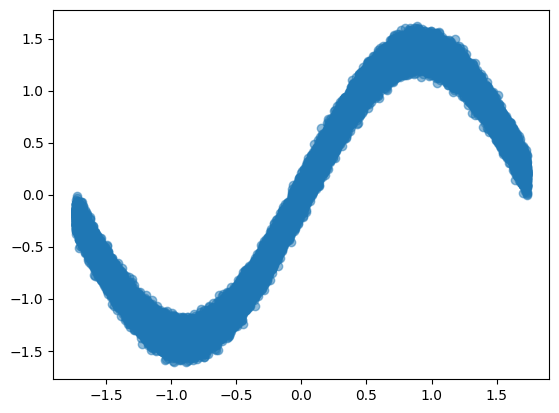

In [7]:
X = np.linspace(-3, 3, 100000)
y = np.sin(X) + 0.05 * np.random.randn(100000)
s1 = StandardScaler()
X_s = s1.fit_transform(X.reshape(-1,1)).ravel()
s2 = StandardScaler()
y_s = s2.fit_transform(y.reshape(-1,1)).ravel()

plt.scatter(X_s, y_s, alpha=0.5)
plt.show()

sine_data = pd.DataFrame({'x1': X_s, 'y': y_s})
sine_data.to_csv("../data/sine_data.csv", index=False)

### S-Curve regression data

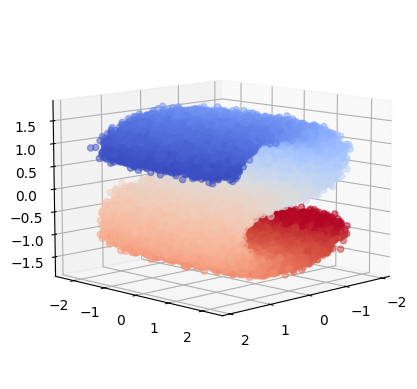

In [8]:
X, y = datasets.make_s_curve(n_samples=100000, noise=0.1)
s1 = StandardScaler()
X_s = s1.fit_transform(X)
s2 = StandardScaler()
y_s = s2.fit_transform(y.reshape(-1,1)).ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(X_s[:,0], X_s[:,1], X_s[:, 2], c=y_s, cmap='coolwarm' ,alpha=0.5)
ax.view_init(azim=45, elev=10)
plt.show()

scurve_data = pd.DataFrame({'x1': X_s[:,0], 'x2': X_s[:,1], 'x3': X_s[:,2], 'y': y_s})
scurve_data.to_csv("../data/scurve_data.csv", index=False)

### CO Emmision regression

In [9]:
gas_turbine_co_and_nox_emission = fetch_ucirepo(id=551) 
X = gas_turbine_co_and_nox_emission.data.features 


In [10]:
y = X['CO']
X = X.drop(columns=['year', 'CO'])

In [11]:
s1 = StandardScaler()
X_s = s1.fit_transform(X)

s2 = StandardScaler()
y_s = s2.fit_transform(y.values.reshape(-1, 1)).ravel()

X_final = pd.DataFrame(X_s, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
X_final['y'] = y_s

bounds = calculate_outlier_bounds(X_final)
print_outlier_counts(X_final, bounds)
print('\n\n')
X_final = remove_outliers_iqr(X_final, a=1.8)
print_outlier_counts(X_final, bounds)

X_final.to_csv("../data/emission_data.csv", index=False)

Column 'x1': 1 outliers
Column 'x2': 612 outliers
Column 'x3': 132 outliers
Column 'x4': 557 outliers
Column 'x5': 7 outliers
Column 'x6': 315 outliers
Column 'x7': 4955 outliers
Column 'x8': 33 outliers
Column 'x9': 10 outliers
Column 'x10': 936 outliers
Column 'y': 2655 outliers



Column 'x1': 0 outliers
Column 'x2': 260 outliers
Column 'x3': 118 outliers
Column 'x4': 185 outliers
Column 'x5': 3 outliers
Column 'x6': 4 outliers
Column 'x7': 661 outliers
Column 'x8': 0 outliers
Column 'x9': 0 outliers
Column 'x10': 55 outliers
Column 'y': 569 outliers
